# Ingesting new data into reference data using `Ingest`

In [1]:
import scanpy as sc

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
ad = sc.read('pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')

In [4]:
del ad.uns['celltype_colors']

Should only be the `celltype` variable, don't introduce `cell_type`.

In [28]:
ad

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

## Inspect the two original batches

In [5]:
ad_0_3 = ad[ad.obs.batch.isin(['0', '3'])].copy()

In [6]:
sc.pp.pca(ad_0_3)
sc.pp.neighbors(ad_0_3)
sc.tl.umap(ad_0_3)

Clearly, we see a huge batch effect.

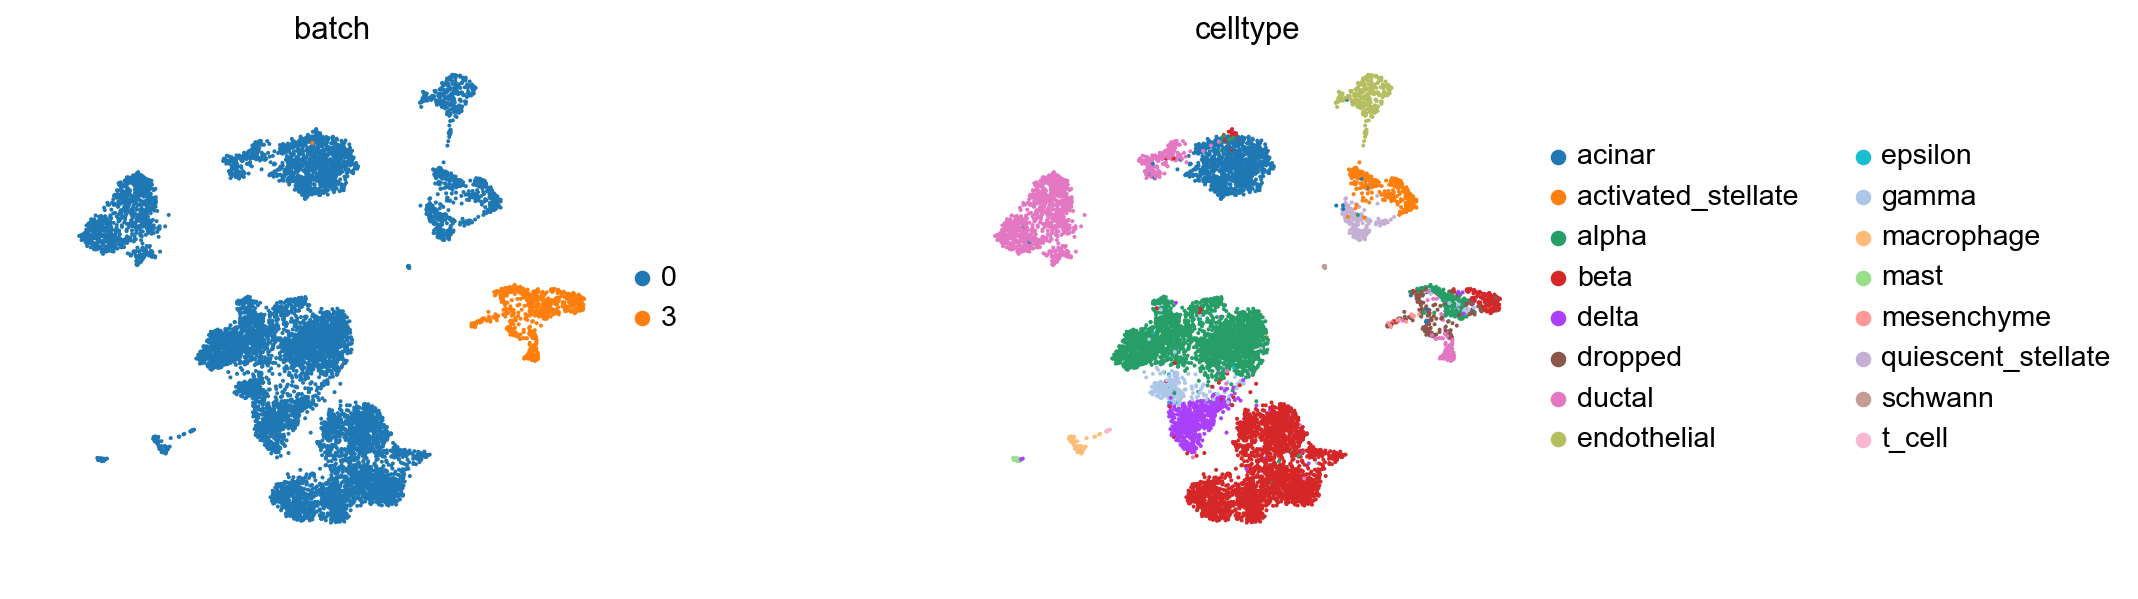

In [7]:
sc.pl.umap(ad_0_3, color=['batch', 'celltype'], wspace=.5)

## Mapping one new batch into the existing data

In [8]:
ad_ref = ad[ad.obs.batch.isin(['0'])].copy()
ad_new = ad[ad.obs.batch.isin(['3'])].copy()

In [9]:
ad_ref.obs['cell_type'] = ad_ref.obs['celltype'].tolist()

In [10]:
sc.pp.pca(ad_ref)
sc.pp.neighbors(ad_ref)
sc.tl.umap(ad_ref)

... storing 'cell_type' as categorical


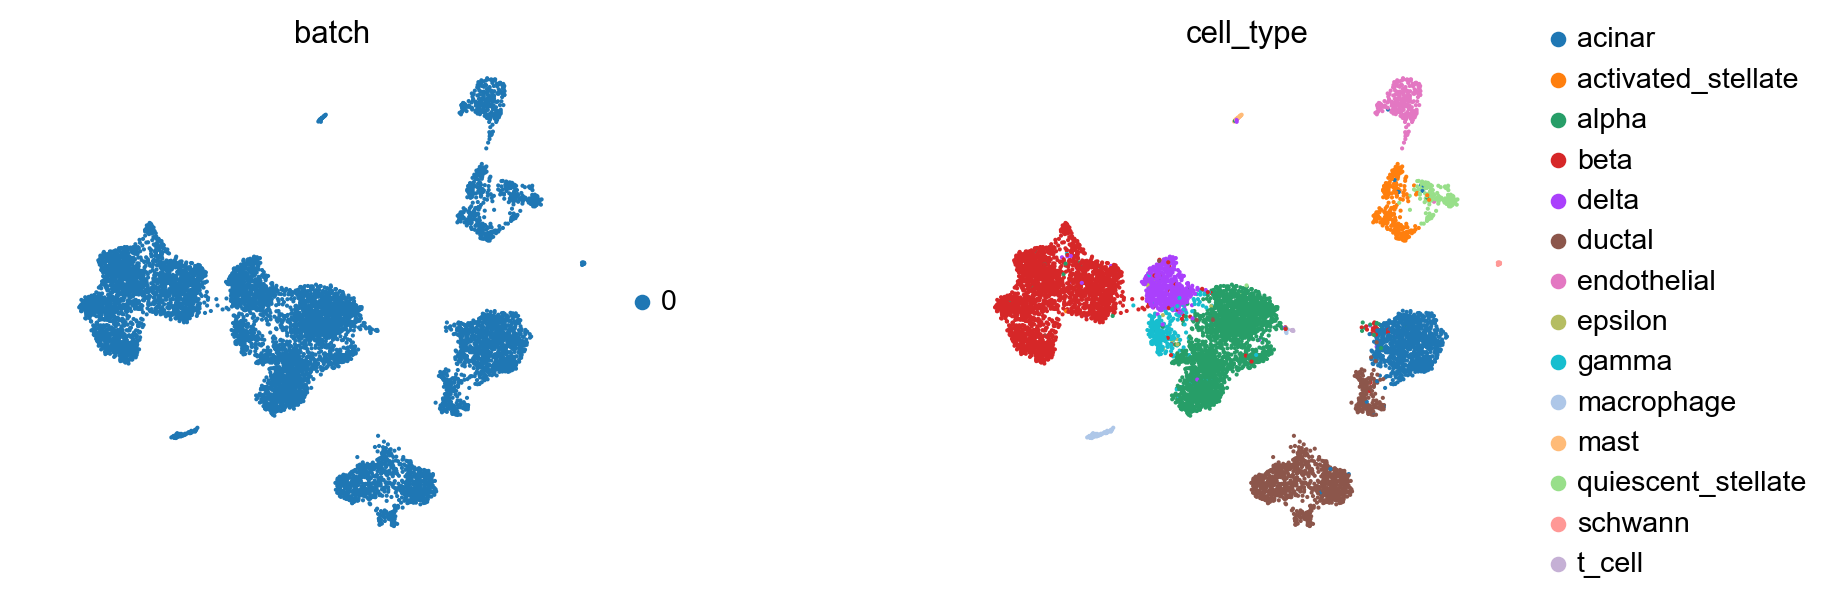

In [11]:
sc.pl.umap(ad_ref, color=['batch', 'cell_type'], wspace=.5)

In [15]:
ad_joint = sc.tl.ingest(ad_new, ad_ref, obs='cell_type', embedding_method=['umap', 'pca'], k=15, return_joint=True)

... storing 'cell_type' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


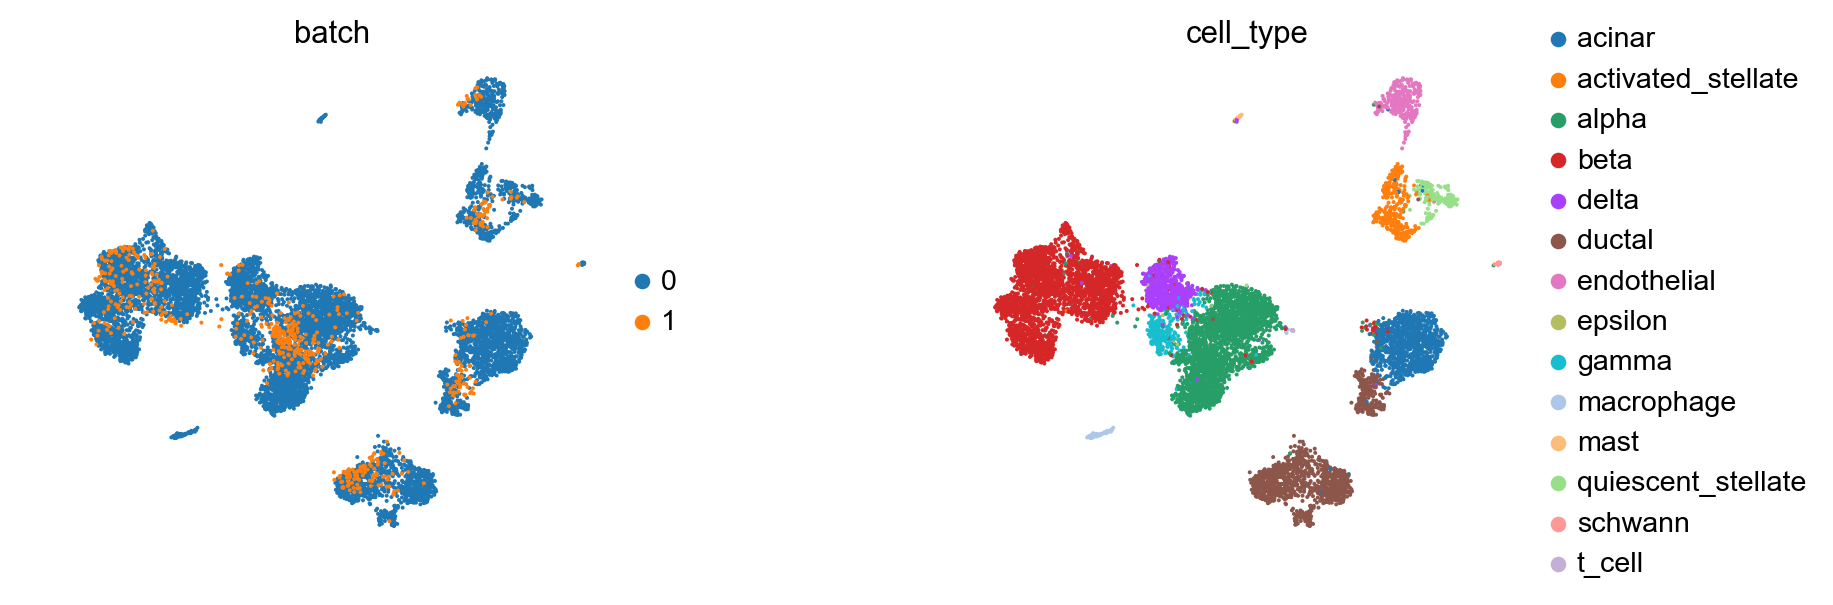

In [16]:
sc.pl.umap(ad_joint, color=['batch', 'cell_type'], wspace=.5)

## Adding more batches

In [17]:
ad_joint

AnnData object with n_obs × n_vars = 9204 × 2448 
    obs: 'batch', 'cell_type', 'celltype', 'louvain', 'n_counts', 'n_genes', 'sample'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'batch_colors', 'cell_type_colors'
    obsm: 'X_umap', 'X_pca'

In [19]:
sc.pp.neighbors(ad_joint)

In [20]:
ad_new = ad[ad.obs.batch.isin(['2'])].copy()

In [25]:
ad_joint.uns['umap'] = ad_ref.uns['umap']
ad_joint.uns['pca'] = ad_ref.uns['pca']
ad_joint.varm['PCs'] = ad_ref.varm['PCs']

In [26]:
ad_0_3_2 = sc.tl.ingest(ad_new, ad_joint, obs='cell_type', embedding_method=['umap', 'pca'], k=15, return_joint=True)

Here, we'd like to plot the original batch variable.

... storing 'cell_type' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


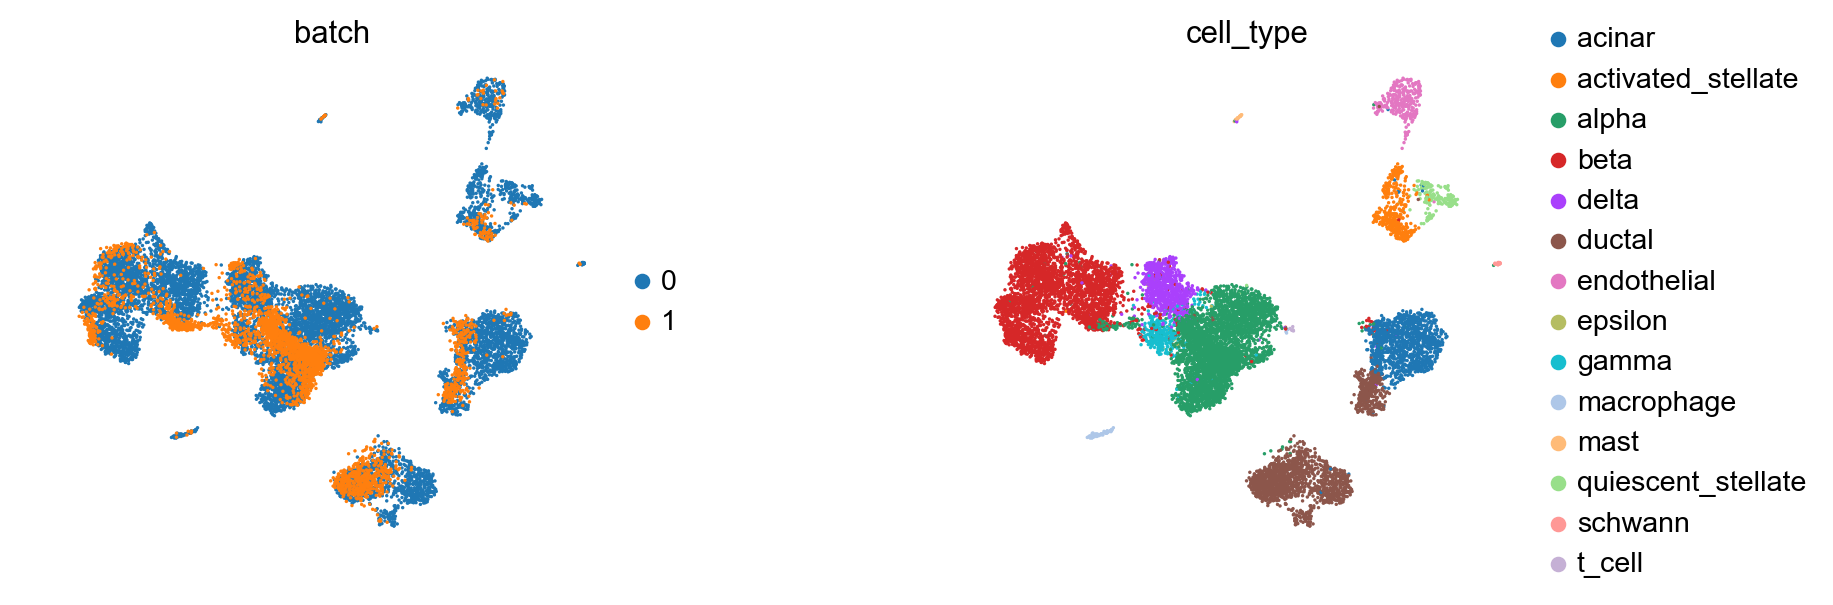

In [27]:
sc.pl.umap(ad_0_3_2, color=['batch', 'cell_type'], wspace=.5)